In [3]:
import pandas as pd

with open("C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/all_months_clean.csv", "r", encoding="utf-8") as f:
    for _ in range(10):
        print(f.readline())


order_id;total_qty;total_weight_gr;total_returned_qty;Total Diskon;product_categories;num_product_categories;Status Pesanan;Alasan Pembatalan;Opsi Pengiriman;Metode Pembayaran;Kota/Kabupaten;Provinsi;Ongkos Kirim Dibayar oleh Pembeli;Estimasi Potongan Biaya Pengiriman;Total Pembayaran;Perkiraan Ongkos Kirim;Waktu Pesanan Dibuat;source_file

ORD_0000001;2;2000;0;0;Celengan;1;Selesai;;Reguler (Cashless)-SPX Standard;Saldo ShopeePay;KOTA SERANG;BANTEN;0;10000;38300;10000;2024-04-01 00:15;AprilSales2024.xlsx

ORD_0000002;1;500;0;0;Celengan;1;Selesai;;Hemat Kargo-SPX Hemat;COD (Bayar di Tempat);KOTA SEMARANG;JAWA TENGAH;0;14500;18576;14500;2024-04-01 01:47;AprilSales2024.xlsx

ORD_0000003;1;500;0;0;Celengan;1;Selesai;;Hemat Kargo-SPX Hemat;SeaBank Bayar Instan;KAB. BOGOR;JAWA BARAT;0;8000;7069;8000;2024-04-01 04:25;AprilSales2024.xlsx

ORD_0000004;2;400;0;0;Mangkok Sambal / Saus;1;Selesai;;Hemat Kargo-SPX Hemat;COD (Bayar di Tempat);KOTA JAMBI;JAMBI;0;20000;32200;20000;2024-04-01 04:41;Apri

In [4]:
import pandas as pd

df = pd.read_csv(
    "C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/all_months_clean.csv",
    sep=";",
    encoding="utf-8"
)

print(df.shape)
print(df.dtypes)
print(df.head())


(20848, 19)
order_id                              object
total_qty                              int64
total_weight_gr                        int64
total_returned_qty                     int64
Total Diskon                           int64
product_categories                    object
num_product_categories                 int64
Status Pesanan                        object
Alasan Pembatalan                     object
Opsi Pengiriman                       object
Metode Pembayaran                     object
Kota/Kabupaten                        object
Provinsi                              object
Ongkos Kirim Dibayar oleh Pembeli      int64
Estimasi Potongan Biaya Pengiriman     int64
Total Pembayaran                       int64
Perkiraan Ongkos Kirim                 int64
Waktu Pesanan Dibuat                  object
source_file                           object
dtype: object
      order_id  total_qty  total_weight_gr  total_returned_qty  Total Diskon  \
0  ORD_0000001          2             2

In [5]:
import pandas as pd

# Load with correct delimiter
df = pd.read_csv(
    "C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/all_months_clean.csv",
    sep=";",
    encoding="utf-8"
)

# -----------------------------
# 1. Normalize column names
# -----------------------------
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("/", "_")
)

# -----------------------------
# 2. Convert datetime column
# -----------------------------
df["waktu_pesanan_dibuat"] = pd.to_datetime(
    df["waktu_pesanan_dibuat"],
    errors="coerce"
)

# -----------------------------
# 3. Clean text columns
# -----------------------------
text_cols = [
    "order_id", "product_categories", "status_pesanan",
    "alasan_pembatalan", "opsi_pengiriman", "metode_pembayaran",
    "kota_kabupaten", "provinsi", "source_file"
]

for col in text_cols:
    df[col] = df[col].astype(str).str.strip()

# -----------------------------
# 4. Replace empty cancellation reasons with None
# -----------------------------
df["alasan_pembatalan"] = df["alasan_pembatalan"].replace({"": None})

# -----------------------------
# 5. Add engineered fields
# -----------------------------
df["is_cancelled"] = df["status_pesanan"].str.contains("Batal", case=False)
df["is_completed"] = df["status_pesanan"].str.contains("Selesai", case=False)

# Revenue (excluding cancelled orders)
df["net_revenue"] = df["total_pembayaran"] - df["total_diskon"]

# Shipping net cost
df["shipping_net"] = (
    df["ongkos_kirim_dibayar_oleh_pembeli"]
    - df["estimasi_potongan_biaya_pengiriman"]
)

df.head()


,order_id,total_qty,total_weight_gr,total_returned_qty,total_diskon,product_categories,num_product_categories,status_pesanan,alasan_pembatalan,opsi_pengiriman,...,ongkos_kirim_dibayar_oleh_pembeli,estimasi_potongan_biaya_pengiriman,total_pembayaran,perkiraan_ongkos_kirim,waktu_pesanan_dibuat,source_file,is_cancelled,is_completed,net_revenue,shipping_net
0,ORD_0000001,2,2000,0,0,Celengan,1,Selesai,nan,Reguler (Cashless)-SPX Standard,...,0,10000,38300,10000,2024-04-01 00:15:00,AprilSales2024.xlsx,False,True,38300,-10000
1,ORD_0000002,1,500,0,0,Celengan,1,Selesai,nan,Hemat Kargo-SPX Hemat,...,0,14500,18576,14500,2024-04-01 01:47:00,AprilSales2024.xlsx,False,True,18576,-14500
2,ORD_0000003,1,500,0,0,Celengan,1,Selesai,nan,Hemat Kargo-SPX Hemat,...,0,8000,7069,8000,2024-04-01 04:25:00,AprilSales2024.xlsx,False,True,7069,-8000
3,ORD_0000004,2,400,0,0,Mangkok Sambal / Saus,1,Selesai,nan,Hemat Kargo-SPX Hemat,...,0,20000,32200,20000,2024-04-01 04:41:00,AprilSales2024.xlsx,False,True,32200,-20000
4,ORD_0000005,3,3600,0,0,"Keranjang, Other, Tempat Nasi",3,Batal,Dibatalkan oleh Pembeli. Alasan: Ubah Pesanan ...,Hemat Kargo-SPX Hemat,...,0,0,0,8000,2024-04-01 06:12:00,AprilSales2024.xlsx,True,False,0,0


In [6]:
df.to_csv("C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/all_months_clean_prepared.csv", index=False, encoding="utf-8")


In [7]:
df.head(30).to_csv(
    "C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/all_months_clean_first30.csv",
    index=False,
    encoding="utf-8"
)


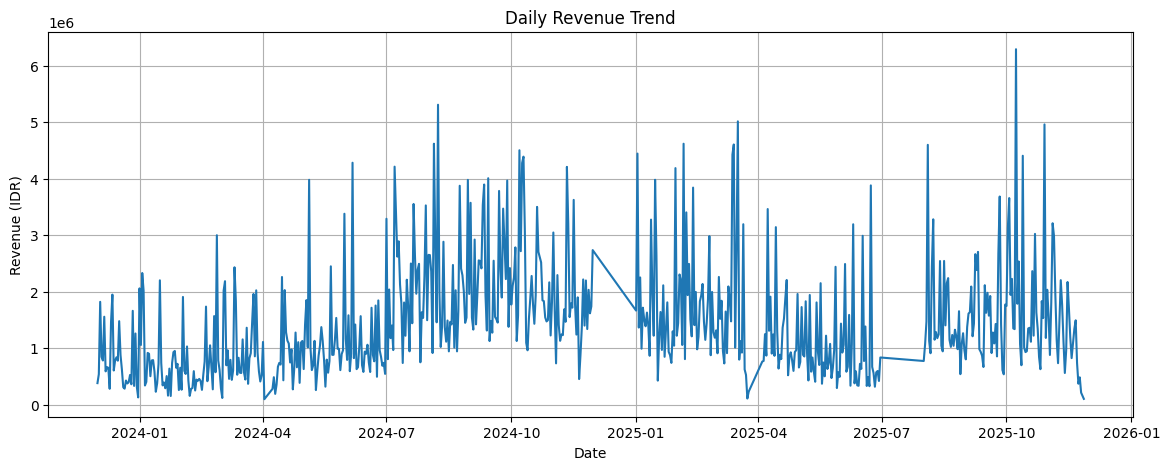

In [8]:
import matplotlib.pyplot as plt

daily_rev = (
    df[df["is_completed"]]
    .groupby(df["waktu_pesanan_dibuat"].dt.date)["net_revenue"]
    .sum()
)

plt.figure(figsize=(14,5))
daily_rev.plot(kind="line")
plt.title("Daily Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Revenue (IDR)")
plt.grid(True)
plt.show()


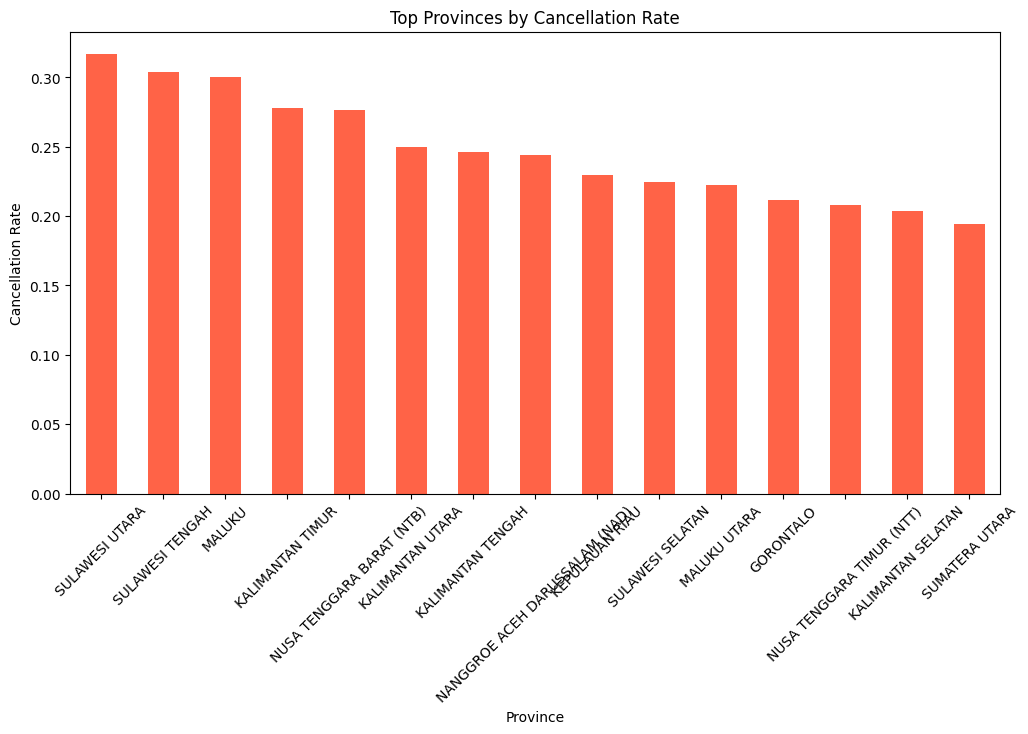

In [9]:
cancel_by_province = (
    df.groupby("provinsi")["is_cancelled"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(12,6))
cancel_by_province.head(15).plot(kind="bar", color="tomato")
plt.title("Top Provinces by Cancellation Rate")
plt.ylabel("Cancellation Rate")
plt.xlabel("Province")
plt.xticks(rotation=45)
plt.show()


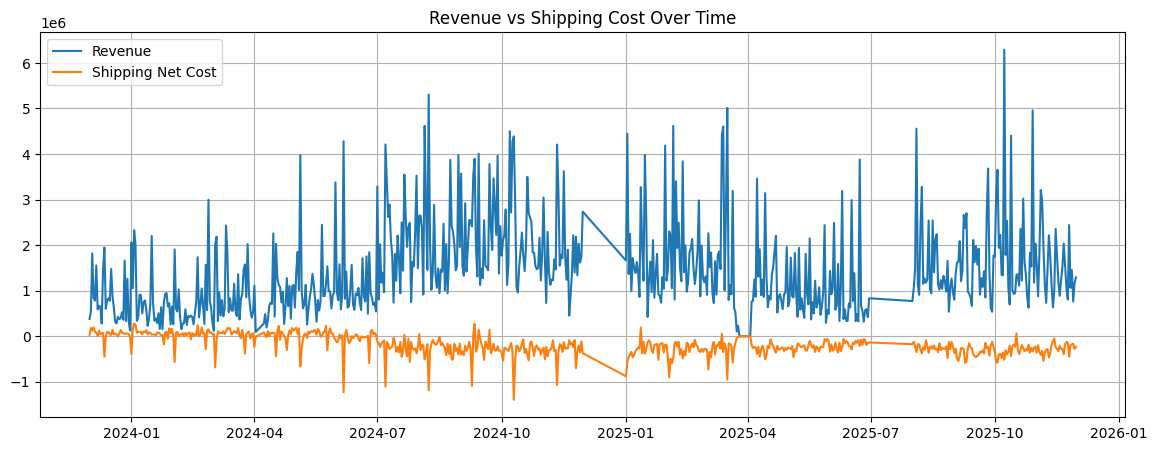

In [10]:
shipping_summary = df.groupby(df["waktu_pesanan_dibuat"].dt.date).agg(
    total_revenue=("net_revenue", "sum"),
    total_shipping=("shipping_net", "sum")
)

plt.figure(figsize=(14,5))
plt.plot(shipping_summary.index, shipping_summary["total_revenue"], label="Revenue")
plt.plot(shipping_summary.index, shipping_summary["total_shipping"], label="Shipping Net Cost")
plt.title("Revenue vs Shipping Cost Over Time")
plt.legend()
plt.grid(True)
plt.show()


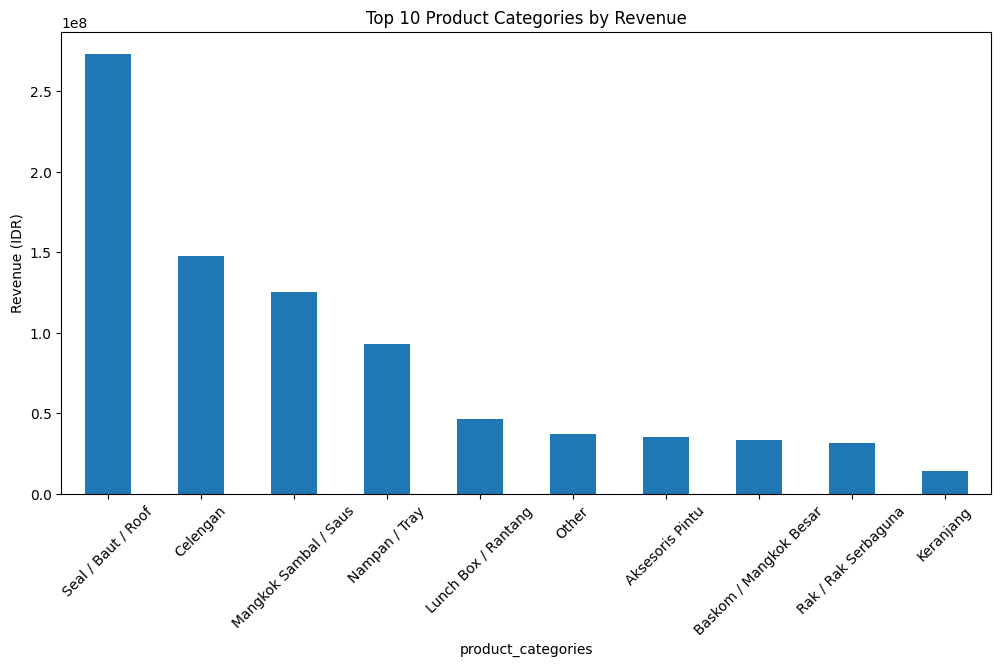

In [11]:
category_perf = (
    df[df["is_completed"]]
    .groupby("product_categories")["net_revenue"]
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(12,6))
category_perf.head(10).plot(kind="bar")
plt.title("Top 10 Product Categories by Revenue")
plt.ylabel("Revenue (IDR)")
plt.xticks(rotation=45)
plt.show()


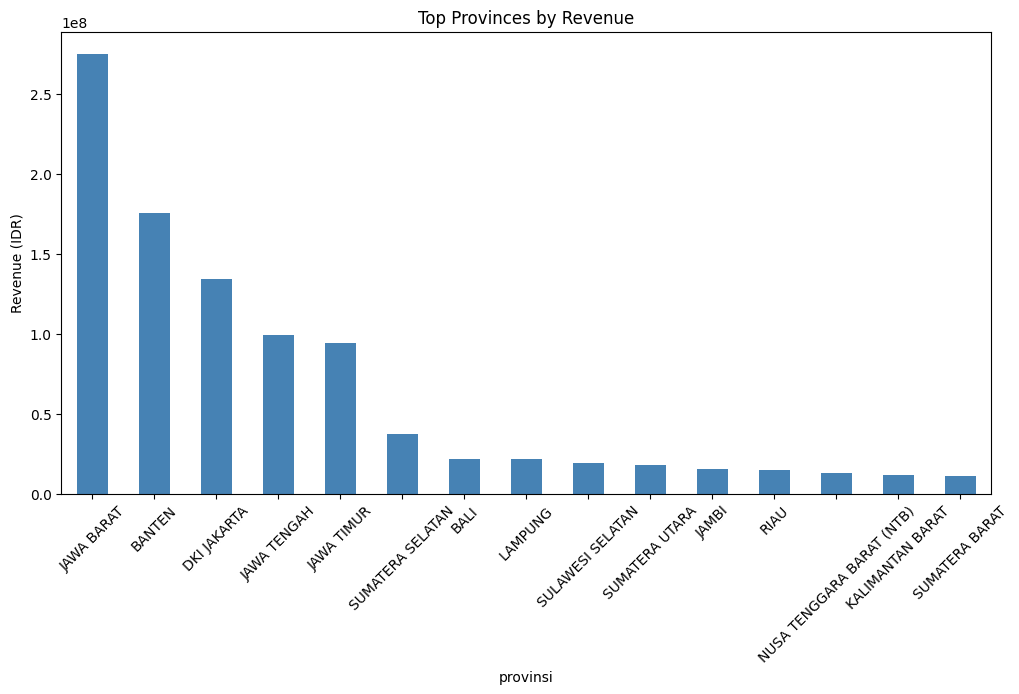

In [12]:
province_sales = (
    df[df["is_completed"]]
    .groupby("provinsi")["net_revenue"]
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(12,6))
province_sales.head(15).plot(kind="bar", color="steelblue")
plt.title("Top Provinces by Revenue")
plt.ylabel("Revenue (IDR)")
plt.xticks(rotation=45)
plt.show()


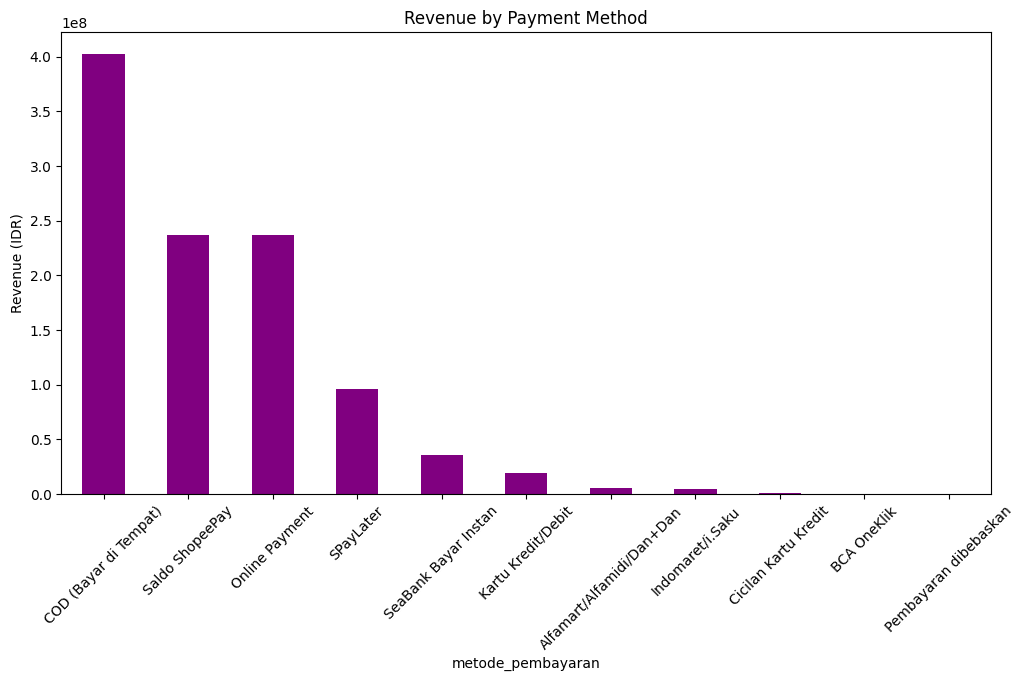

In [13]:
payment_method_perf = (
    df[df["is_completed"]]
    .groupby("metode_pembayaran")["net_revenue"]
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(12,6))
payment_method_perf.plot(kind="bar", color="purple")
plt.title("Revenue by Payment Method")
plt.ylabel("Revenue (IDR)")
plt.xticks(rotation=45)
plt.show()
